<a href="https://colab.research.google.com/github/PBLEAVITT/MAT-421/blob/main/MAT421HW17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAT 421 HW 17.4, 17.5 - Parker Leavitt**

# *17.4 - Lagrange Polynomial Interpolation*

Instead of finding cubic polynomials between subsaqunt data points, **Lagrange Polynomial Interpolation** finds a single polynomial that goes through all points. This single polynomial is called the **Lagrange Polynomial**. For discovering Lagrange Polynomials, it's super helpful to write linear combinations of **Lagrange basis polynomials**.

Example: Find the Lagrange basis polynomials for the data set x = [0, 2, 4] and y = [2, 6, 4].
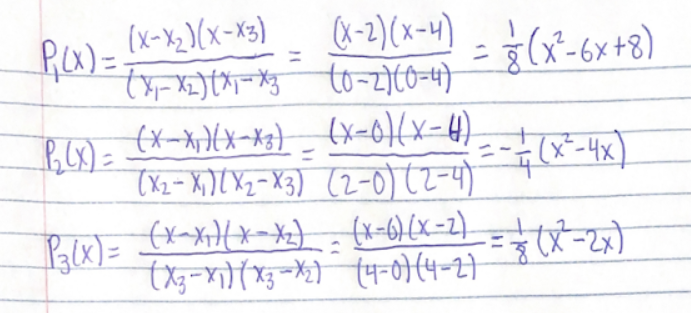

<ipython-input-3-bf750ef65dca>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


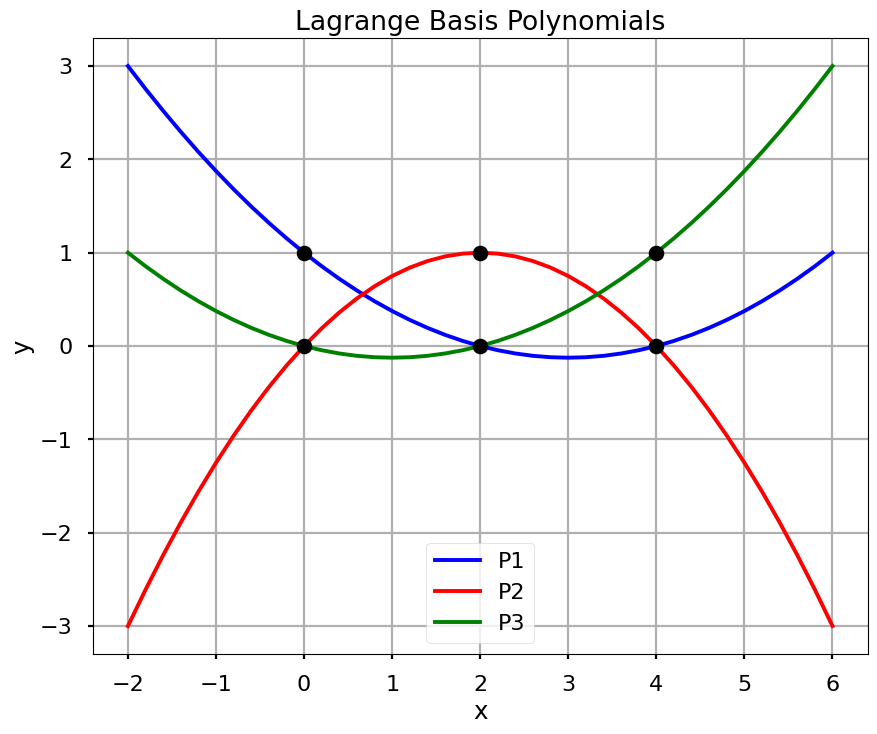

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
x = [0, 2, 4]
y = [2, 6, 4]
P1_coeff = [1,-0.75, 0.125]
P2_coeff = [0, 1,-0.25]
P3_coeff = [0,-0.25, 0.125]
# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
x_new = np.arange(-2.0, 6.2, 0.2)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

***Verify that the Lagrange goes through each of the data points***

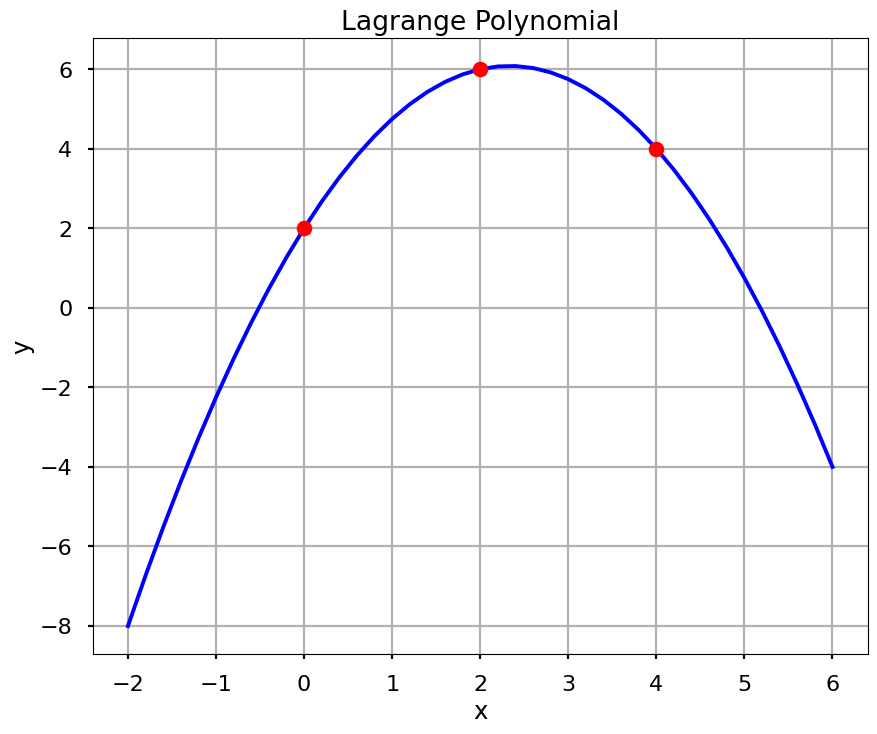

In [7]:
L = 2*P1 + 6*P2 + 4*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Using Lagrange From Spicy

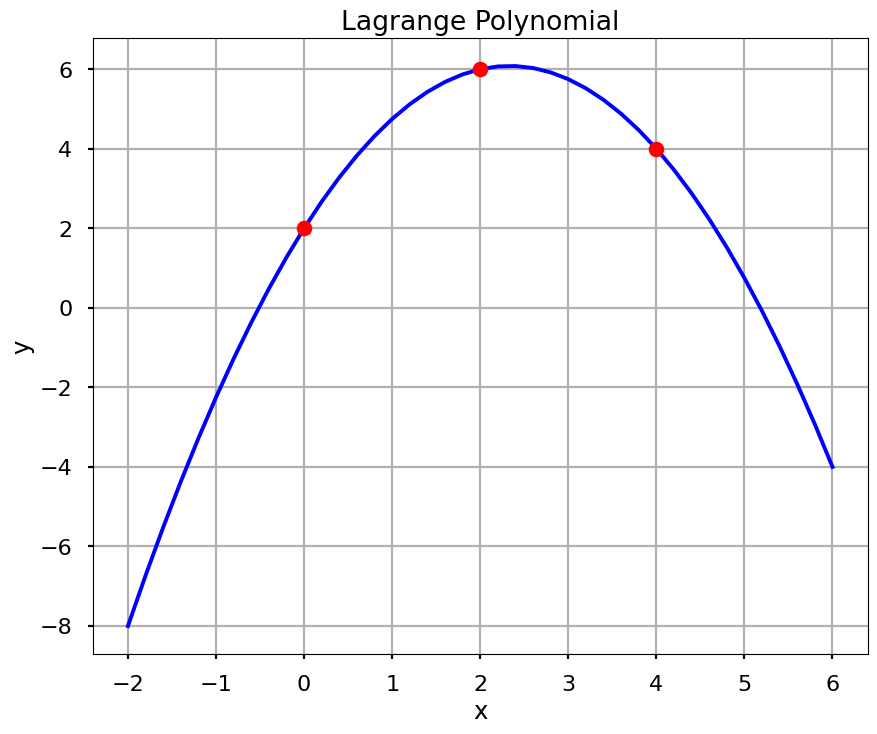

In [8]:
from scipy.interpolate import lagrange
f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# *17.5 - Newton’s Polynomial Interpolation*

**Newton's Polynomial Interpolation** is a popular way to fit exactly for a set of data points.
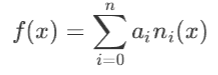

A unique feautre of Newton's Polynomial method is that 'a' can be discovered using a simple mathmatical procedure known as **divided differences**. This method is great beacause adding in new data point won't affect any other the old data points. You only need to calculate the higher difference using the same method as before.

Example: Calculate the divided differences table for x = [-10, -2, 0, 4], y = [-4, 12, 2, 6]

<ipython-input-20-cfa1e2545f41>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


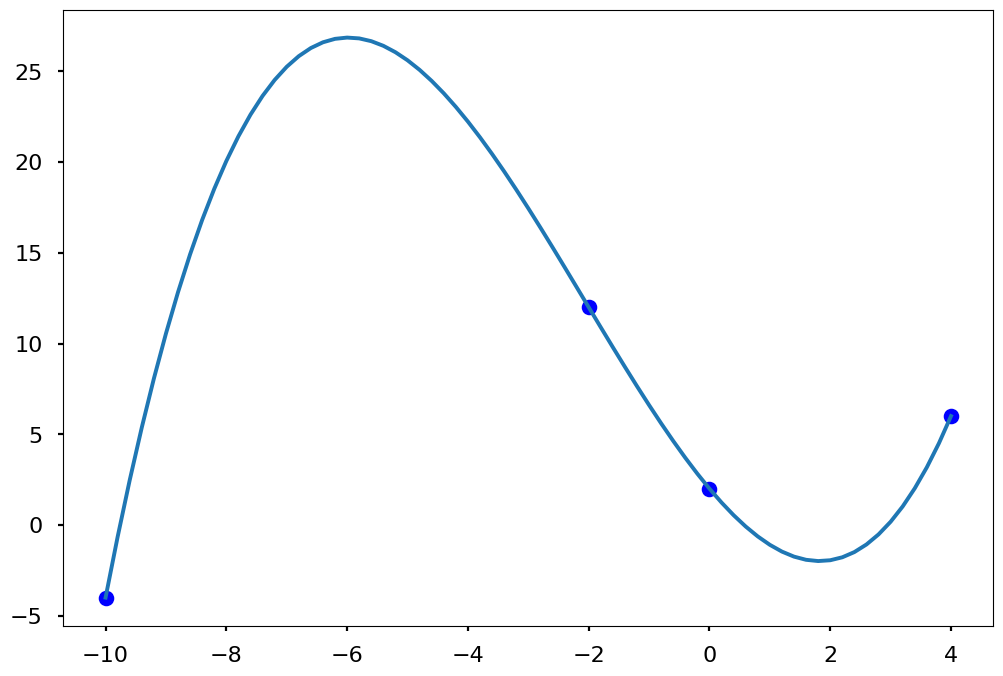

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
        coef[i][j] = \
        (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([-10, -2, 0, 4])
y = np.array([-4, 12, 2, 6])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-10, 4.2, .2)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)